In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jul 26 22:15:45 2018

@author: annb
"""

import warnings
#Ignoring them.
warnings.filterwarnings('ignore')
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# Evaluating the ANN
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.layers import Input
from keras.models import Model
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.layers import LSTM
from keras.layers import Dropout
import os
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
#reading all the base data and appending it to a single data frame
filenames= os.listdir ('D:/Project/anurakta/39A_segments/39A_segments') 
# get all files' and folders' names in the current directory
base_data=[]
for file in filenames:
    new =os.path.join(os.path.abspath('D:/Project/anurakta/39A_segments/39A_segments'), file)
    base=pd.read_csv(new,names=["dur","time","from_to","day","rains","temp"])
    base_data.append(base)
   

In [3]:
#creating an empty data frame with the corresponding columns names#
column_names=("dur","time","from_to","day","rains","temp")
df = pd.DataFrame(columns=column_names)

In [4]:
#appending the dataframe to df
for dataframe in base_data:
    #print(dataframe.head)
    df = df.append(dataframe)
   

In [5]:
#to check the length of the data frame#
len(df)

2022193

We know that it takes approximately an average of 110 seconds for the 39A bus to leave from terminus at UCD and reach the bus stop at stillorgan This time includes any dwell time at UCD and not at stillorgan. This information is baked in the data.

In [6]:
#creating the features for each day variables
New_base=pd.get_dummies(df, columns=["day"], prefix=["day"])
print(New_base.columns)

Index(['dur', 'time', 'from_to', 'rains', 'temp', 'day_Friday', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday'],
      dtype='object')


In [7]:
#the final modelling data is created
Final_base_data=New_base[['dur', 'time', 'rains', 'temp', 'day_Friday', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday']]


In [8]:
#to check for nulls in the dataframe
print(Final_base_data.isnull().sum())
Final_base_data=Final_base_data.fillna(0)
dataset = Final_base_data

dur                0
time               0
rains            978
temp               0
day_Friday         0
day_Monday         0
day_Saturday       0
day_Sunday         0
day_Thursday       0
day_Tuesday        0
day_Wednesday      0
dtype: int64


In [9]:
#verifying the column names in the dataframe
dataset.columns

Index(['dur', 'time', 'rains', 'temp', 'day_Friday', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday'],
      dtype='object')

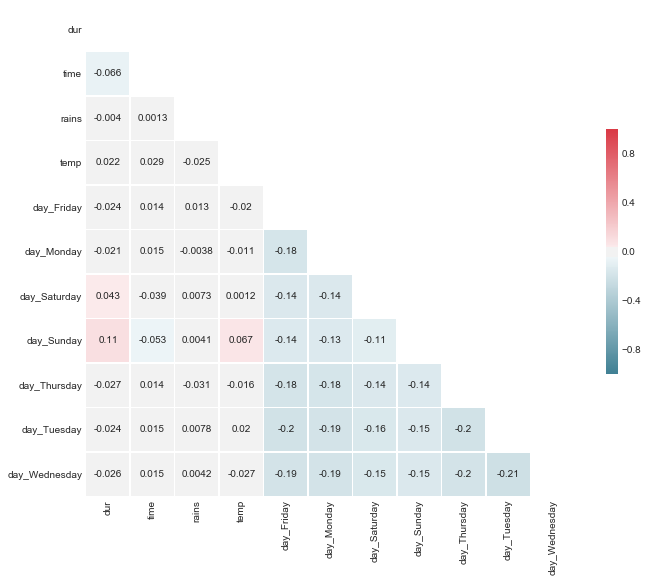

In [10]:
#correlation chart for all the variables showing clear pattern#

sns.set_style("white")
cont_corr = dataset.corr()
mask = np.zeros_like(cont_corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap=sns.diverging_palette(220,10, as_cmap = True)
sns.heatmap(cont_corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, xticklabels=True, yticklabels=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
X=dataset[['time', 'rains', 'temp', 'day_Friday', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday']].values
y=dataset['dur'].values

In [12]:
#testing linear regression #

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
X_new = sm.add_constant(X_train)
model = sm.OLS(y_train,X_new).fit()
print(model.params.tolist())


[47137.46649622004, -18.05582760753323, -179.11719199030568, 58.88849791510032, 5336.344142088362, 5485.285321928058, 8374.603084670549, 12023.685845305727, 5213.3933818796695, 5371.558400976441, 5332.596319371325]


In [13]:
#printing the model details#
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     2982.
Date:                Thu, 09 Aug 2018   Prob (F-statistic):               0.00
Time:                        20:00:43   Log-Likelihood:            -1.5822e+07
No. Observations:             1415535   AIC:                         3.164e+07
Df Residuals:                 1415525   BIC:                         3.164e+07
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.714e+04     33.189   1420.280      0.0

In [14]:
#creating the training test split

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X, y, test_size=0.20, random_state=42)

print(len(y_test_scaled))
# Feature Scaling

# Reshaping
X_train_scaled = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))

404439


In [ ]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages


# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train_scaled, y_train_scaled, epochs = 1, batch_size = 32)




Epoch 1/1
  39616/1617754 [..............................] - ETA: 15:26 - loss: 3086101606.8756

This is cost function that gets optimised with each forward feed and back propogation in deep learning. 

In [17]:
#final_output=np.insert(x, idx, 999, axis=1)
X_test_scaled = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))


predicted_time = regressor.predict(X_test_scaled)
predicted_time=predicted_time

In [18]:
len(predicted_time.flatten())

404439

In [19]:
len(y_test_scaled)

404439

This indicates that the model is robust as the test and the predictions come up with the same value.

In [20]:
#perormance checking of the model on testdata#
from sklearn import metrics
print(metrics.mean_absolute_error(predicted_time.flatten(),y_test_scaled))
print(metrics.mean_squared_error(predicted_time.flatten(),y_test_scaled))
print(np.sqrt(metrics.mean_squared_error(predicted_time.flatten(),y_test_scaled)))

50188.41324042003
2823901081.5023417
53140.39030250288
